### <span style='color:blue '> Projet 7, Implémentez un modèle de scoring </span>

#### Notebook de modélisation

##### Librairies à importer

In [1]:
#Librairies à importer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time, pickle
import timeit
import lime.lime_tabular

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, fbeta_score
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import roc_curve

In [6]:
from sklearn import model_selection, kernel_ridge, linear_model
import statsmodels.api as sm
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials

In [7]:
import shap

In [8]:
import warnings
warnings.filterwarnings("ignore")

#### Chargement des datasets 

In [9]:
df =  pd.read_csv("df_cleaned_enc.csv")

In [10]:
df.head(10)

,TARGET,SK_ID_CURR,AGE,DAYS_EMPLOYED_PERCENT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,...,FLAG_DOCUMENT_6,HOUR_APPR_PROCESS_START,FLAG_PHONE,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_16,FLAG_DOCUMENT_13,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,1,100002,25,-0.067329,2,2,-1134.0,-2120,0,1,...,0,10,1,24700.5,0.0,0,0,0,1,0
1,0,100003,45,-0.070862,1,1,-828.0,-291,0,1,...,0,11,1,35698.5,0.0,0,0,1,0,0
2,0,100004,52,-0.011814,2,2,-815.0,-2531,0,1,...,0,9,1,6750.0,0.0,0,0,0,1,0
3,0,100006,52,-0.159905,2,2,-617.0,-2437,0,1,...,0,17,0,29686.5,0.0,0,0,1,0,0
4,0,100007,54,-0.152418,2,2,-1106.0,-3458,1,1,...,0,11,0,21865.5,0.0,0,0,0,1,0
5,0,100008,46,-0.093737,2,2,-2536.0,-477,0,1,...,0,16,1,27517.5,0.0,0,0,0,1,0
6,0,100009,37,-0.227174,2,2,-1562.0,-619,0,1,...,0,16,1,41301.0,1.0,0,0,1,0,0
7,0,100010,51,-0.023820,3,3,-1070.0,-2379,1,1,...,0,16,0,42075.0,0.0,0,0,0,1,0
8,0,100011,55,-0.100000,2,2,0.0,-3514,0,0,...,0,14,0,33826.5,0.0,0,0,1,0,0
9,0,100012,39,-0.139540,2,2,-1673.0,-3992,0,1,...,0,8,0,20250.0,0.0,0,0,0,1,0


#### Dataframe pour API intéractive

In [12]:
df1 = df[:45]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       45 non-null     int64  
 1   SK_ID_CURR                   45 non-null     int64  
 2   AGE                          45 non-null     int64  
 3   DAYS_EMPLOYED_PERCENT        45 non-null     float64
 4   REGION_RATING_CLIENT_W_CITY  45 non-null     int64  
 5   REGION_RATING_CLIENT         45 non-null     int64  
 6   DAYS_LAST_PHONE_CHANGE       45 non-null     float64
 7   DAYS_ID_PUBLISH              45 non-null     int64  
 8   REG_CITY_NOT_WORK_CITY       45 non-null     int64  
 9   FLAG_EMP_PHONE               45 non-null     int64  
 10  REG_CITY_NOT_LIVE_CITY       45 non-null     int64  
 11  FLAG_DOCUMENT_3              45 non-null     int64  
 12  DAYS_REGISTRATION            45 non-null     float64
 13  LIVE_CITY_NOT_WORK_CIT

In [14]:
#  Export du fichier 45 lignes , encodé, non standardisé pour API
df1.to_csv('df1.csv', index=False)

In [15]:
df1 =  pd.read_csv("df1.csv")

In [16]:
import pickle
# now you can save it to a file
with open('df1.pkl', 'wb') as f:
    pickle.dump(df1, f)

In [17]:
df2 = df[45:]

In [18]:
df2

,TARGET,SK_ID_CURR,AGE,DAYS_EMPLOYED_PERCENT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,...,FLAG_DOCUMENT_6,HOUR_APPR_PROCESS_START,FLAG_PHONE,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_16,FLAG_DOCUMENT_13,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
45,0,100052,21,-0.112240,2,2,-462.0,-642,0,1,...,0,10,0,9000.0,0.0,0,0,1,0,0
46,0,100053,55,-0.100000,2,2,-649.0,-1993,0,0,...,0,8,0,17649.0,0.0,0,0,1,0,0
47,0,100054,55,-0.264997,2,2,-1247.0,-3283,1,1,...,0,16,1,26838.0,0.0,0,0,1,0,0
48,0,100055,54,-0.223602,3,3,-784.0,-3199,0,1,...,0,10,1,37255.5,0.0,0,0,1,0,0
49,0,100056,50,-0.521408,2,2,-1498.0,-1797,1,1,...,0,10,0,49927.5,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,456251,25,-0.025303,1,1,-273.0,-1982,0,1,...,0,15,0,27558.0,0.0,0,0,0,1,0
307507,0,456252,56,-0.100000,2,2,0.0,-4090,0,0,...,0,8,1,12001.5,0.0,0,0,1,0,0
307508,0,456253,41,-0.529266,3,3,-1909.0,-5150,1,1,...,0,9,0,29979.0,1.0,0,0,1,0,0
307509,1,456254,32,-0.400134,2,2,-322.0,-931,1,1,...,0,9,0,20205.0,0.0,0,0,1,0,0


### <span style='color:blue '> 1- Pré-processing </span>

#### <span style='color:green'> 1.1. Standardisation des données </span>

In [50]:
# L'échantillon rassemble des variables de grandeur différente, par exemple les salaires vs le nombre d'enfants, etc…

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
#scaled_features = df.copy()

In [21]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(df2)
scaled_train = scaler.transform(df2)

In [22]:
#In order to keep our column names we include scaled_values to our train dataframes like this
df = pd.DataFrame(scaled_train, index=df2.index, columns=df.columns)

In [23]:
df.head()

,TARGET,SK_ID_CURR,AGE,DAYS_EMPLOYED_PERCENT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,...,FLAG_DOCUMENT_6,HOUR_APPR_PROCESS_START,FLAG_PHONE,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_16,FLAG_DOCUMENT_13,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
45,0.0,0.000000,0.020408,0.845996,0.5,0.5,0.892358,0.910796,0.0,1.0,...,0.0,0.434783,0.0,0.028800,0.0,0.0,0.0,1.0,0.0,0.0
46,0.0,0.000003,0.714286,0.862790,0.5,0.5,0.848788,0.723079,0.0,0.0,...,0.0,0.347826,0.0,0.062531,0.0,0.0,0.0,1.0,0.0,0.0
47,0.0,0.000006,0.714286,0.636399,0.5,0.5,0.709459,0.543838,1.0,1.0,...,0.0,0.695652,1.0,0.098368,0.0,0.0,0.0,1.0,0.0,0.0
48,0.0,0.000008,0.693878,0.693196,1.0,1.0,0.817335,0.555509,0.0,1.0,...,0.0,0.434783,1.0,0.138996,0.0,0.0,0.0,1.0,0.0,0.0
49,0.0,0.000011,0.612245,0.284577,0.5,0.5,0.650979,0.750313,1.0,1.0,...,0.0,0.434783,0.0,0.188417,0.0,0.0,0.0,0.0,1.0,0.0


#### <span style='color:green'> 1.2. Préparation des jeux d'entrainement et de test </span>

In [24]:
# Features : toutes les colonnes, sauf la cible
X = df.drop(['TARGET','SK_ID_CURR'], axis=1)

# Le cible
y = df[['TARGET']]

In [25]:
X.shape

(307466, 37)

In [26]:
y.shape

(307466, 1)

#### <span style='color:green'> 1.3. Séparation des jeux de données d'entraînement et de test </span>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215226, 37), (92240, 37), (215226, 1), (92240, 1))

#### <span style='color:green'> 1.4.Choix de la métrique </span>

In [ ]:
FP (False Positive) : les cas où la prédiction est positive, mais où la valeur réelle est négative.

Perte d'opportunité si le crédit client est refusé à tort, alors qu'il aurait été en mesure d'être remboursé.

FN (False Negative) : les cas où la prédiction est négative, mais où la valeur réelle est positive.

Perte réelle si le crédit client accepté se transforme en défaut de paiement.


In [ ]:
Ainsi, les pertes d'un crédit en raison d'une mauvaise classification dépendront des probabilités Faux Positifs et Faux Négatifs.

L'idée est d'éviter les clients avec un fort risque de défaut. Il est donc nécessaire de pénaliser les FP et FN cités précédemment.
Pour réduire ce rique de perte financière, il faut maximiser deux critères Recall et Precision.


#### Custom_score

In [29]:
# score personalisé
# (4.5 * FP  + FN)/ total: on pénalise les faux positif 
# perte plus importante si un pret n'est pas remboursé que si on ne prend pas 1 client
def custom_metric(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    score=1-(((4.5*cm[1,0]) + cm[0, 1])/cm.sum())
    return score

custom_score= metrics.make_scorer(custom_metric, greater_is_better=True)

In [30]:
save_metrics =pd.DataFrame([], columns=['name', 'auc','accurancy', 'custom'])
def calculate_metrics_test(y_predictions):
    acc=metrics.accuracy_score( y_test, y_predictions)
    custom=custom_metric( y_test, y_predictions)
    fpr, tpr, thr = metrics.roc_curve(y_test, y_predictions)
    auc = metrics.auc(fpr, tpr)
    print('AUC :', roc_auc)
    print('Accurancy  :', acc)
    print('Score custom :', custom)

    return {'auc': auc,'accurancy': acc, 'custom': custom}

#### <span style='color:blue'> 2. Modélisation </span>

#### <span style='color:green'> 2.1. Modèle Baseline: Logistic Regression sur les données déséquilibrées </span>

Le projet consiste à mieux comprendre le défaut de crédit rencontré chez certains clients, l'anticiper, l'estimer. 
La prédiction peut se résumer par une acceptation de crédit, ou un refus de crédit. 
Afin d'avoir une première idée des performances possibles, la modélisation par régression logistique permettra d'obtenir 
une baseline.
Nous allons donc créer un modèle baseline pour évaluer les performances de nos futurs modèles et vérifier qu’ils 
améliorent les prédictions.

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
%%time
model_baseline = LogisticRegression(C = 0.0001, max_iter=100)
model_baseline.fit(X_train, y_train)

CPU times: total: 1.39 s
Wall time: 366 ms


LogisticRegression(C=0.0001)

In [33]:
y_pred_base1= model_baseline.predict(X_test)

In [34]:
tab_auroc = []

y_prob_lr = model_baseline.predict_proba(X_test)[:, 1]
y_pred = model_baseline.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, model_baseline.predict(X_test)))

Aire sous la courbe ROC: 0.6805
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84862
         1.0       0.00      0.00      0.00      7378

    accuracy                           0.92     92240
   macro avg       0.46      0.50      0.48     92240
weighted avg       0.85      0.92      0.88     92240



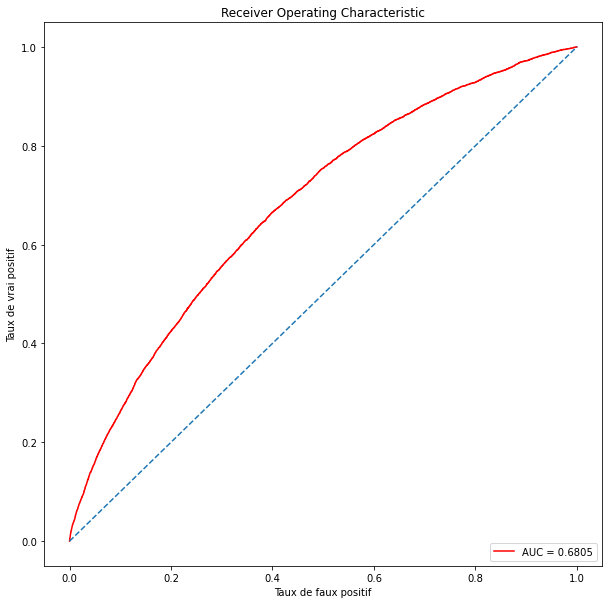

In [35]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

In [ ]:
On a un recall de 1 et une précision de 0.92 sur la classe 0 et 0 pour le recall et la precision de la classe 1
Ce premier modèle baseline prédit la classe majoritaire.

#### <span style='color:green'> 2.1.1. Suréchantillonnage des données à l'aide de SMOTE   </span>
#### SMOTE avec des données déséquilibres à l'aide du module imblearn
Pour rappel, l'échantillon de travail n'est pas équilibré, avec 92% des individus classés en modalité 0 et 8% en modalité 1, à savoir en défaut de paiement de crédit..

In [36]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: [17443] 
Label 0, Before using SMOTE: [197783] 


In [37]:
oversample = SMOTE()

In [38]:
# Oversampling using smote on X_train
SMT = SMOTE(sampling_strategy='auto', k_neighbors=5,
           n_jobs=-1, random_state=14) #'minority'


X_train_SMOTE, y_train_SMOTE = SMT.fit_resample(X_train, y_train)

In [39]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_SMOTE==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_SMOTE==0)))

Label 1, After using SMOTE: 197783
Label 0, After using SMOTE: 197783


#### <span style='color:green'> 2.2. Logistic Regression sur les données équilibrées en utilisant un Grid search CV </span>

In [40]:
%%time
model_baseline2 = LogisticRegression(C = 0.0001, max_iter=100)
model_baseline2.fit(X_train_SMOTE, y_train_SMOTE)

CPU times: total: 2.27 s
Wall time: 652 ms


LogisticRegression(C=0.0001)

In [41]:
y_pred_base2= model_baseline2.predict(X_test)

**Grid SearchCV, LogisticRegression**

In [57]:
# Grid search cross validation

from sklearn.linear_model import LogisticRegression
grid_b={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid_b,scoring= custom_score, cv=4)
logreg_cv.fit(X_train_SMOTE,y_train_SMOTE)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(custom_metric))

In [58]:
best_model = logreg_cv.best_estimator_

In [59]:
y_pred_base= best_model.predict(X_test)
custom_metric

<function __main__.custom_metric(y_test, y_pred)>

In [60]:
print("best parameters:",logreg_cv.best_params_)

best parameters: {'C': 100.0, 'penalty': 'l2'}


In [61]:
from sklearn.metrics import auc

In [62]:
tab_auroc = []

y_prob_lr = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, best_model.predict(X_test)))

Aire sous la courbe ROC: 0.7334
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80     84841
         1.0       0.15      0.66      0.25      7413

    accuracy                           0.68     92254
   macro avg       0.56      0.67      0.52     92254
weighted avg       0.89      0.68      0.75     92254



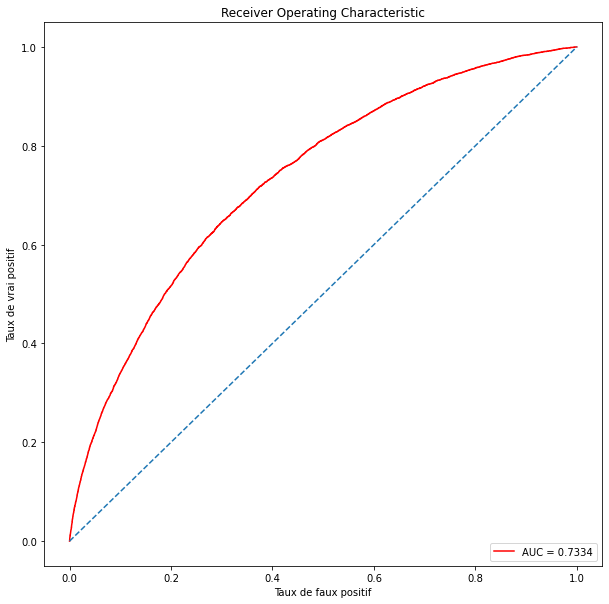

In [63]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

In [ ]:
Ce modèle est plus performant que le modèle de régression logistique baseline. 
L'AUC est de 0.73 alors qu'il était de 0.68
On a un recall de 66.28 % et une precision de 15.40% 
On va continuer d'entrainer d'autres modèles pour comparer les performances

In [64]:
df_metrics=calculate_metrics_test(y_pred_base)
df_metrics['name']='regression logistique'
save_metrics=save_metrics.append(df_metrics,ignore_index=True)

AUC : 0.7334268320420286
Accurancy  : 0.6803824224423873
Score custom : 0.5855735252671971


([<matplotlib.axis.YTick at 0x2c192e518b0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

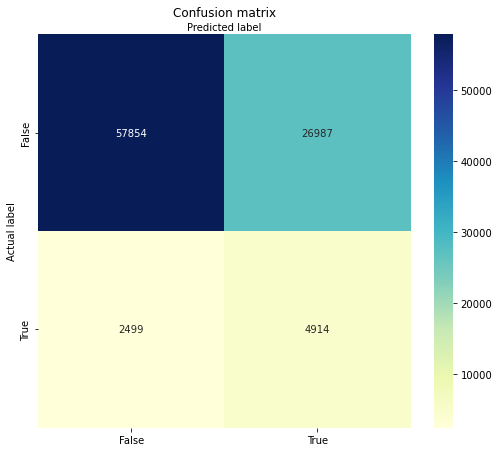

In [65]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_base)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

<AxesSubplot:title={'center':'Feature Importance'}>

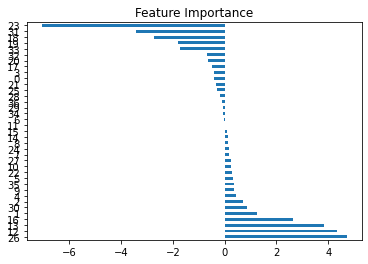

In [66]:
importance = best_model.coef_[0]
feat_importances = pd.Series(importance)
feat_importances.nlargest(37).plot(kind='barh',title = 'Feature Importance')

### Implémentation des modèles
#### <span style='color:green'> 2.3. XGBoost model </span>
#### <span style='color:green'> 2.3.1. XGBoost simple </span>

In [43]:
from xgboost import XGBClassifier
import xgboost as xgb

In [44]:
# fit model no training data
model1 = XGBClassifier()
model1.fit(X_train_SMOTE,y_train_SMOTE,eval_set=[(X_test,y_test),(X_train_SMOTE,y_train_SMOTE)],
          verbose=20,eval_metric='logloss')

[0]	validation_0-logloss:0.61883	validation_1-logloss:0.61130
[20]	validation_0-logloss:0.28577	validation_1-logloss:0.20140
[40]	validation_0-logloss:0.26168	validation_1-logloss:0.15701
[60]	validation_0-logloss:0.25656	validation_1-logloss:0.14400
[80]	validation_0-logloss:0.25491	validation_1-logloss:0.13734
[99]	validation_0-logloss:0.25424	validation_1-logloss:0.13286


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
# Prédiction sur le jeu de test
y_pred_1 = model1.predict(X_test)
predictions = [round(value) for value in y_pred_1]

In [46]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_1)
df_metrics['name']='XG_Boost'

save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_1)

AUC : 0.6804741094209246
Accurancy  : 0.9191023417172594
Score custom : 0.6475715524718126
Le temps d'éxecution est : 1.5318101999998817


array([[84556,   306],
       [ 7156,   222]], dtype=int64)

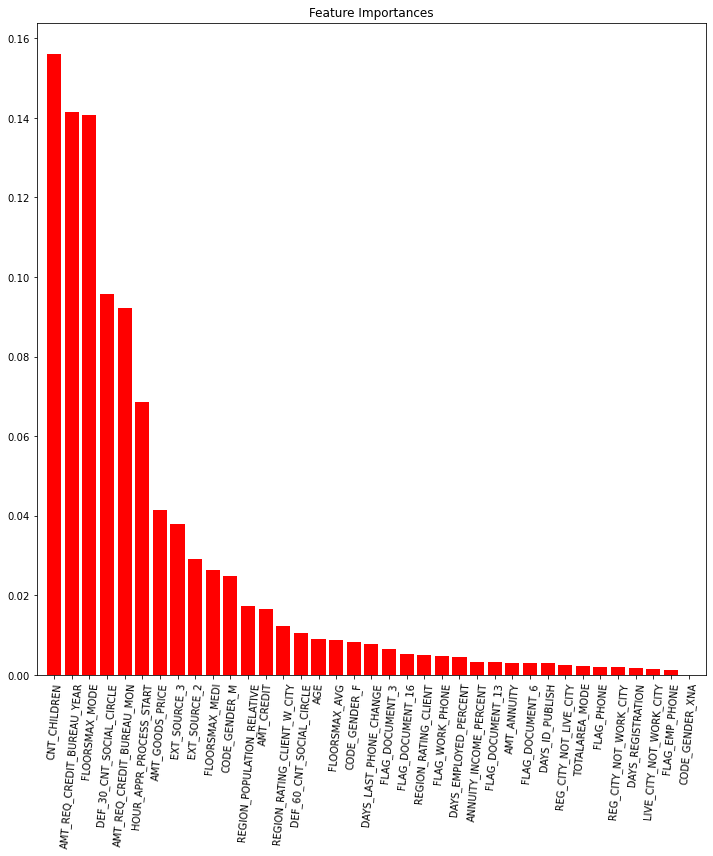

In [47]:
importances = model1.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Feature Importances')
plt.bar(range(X_train_SMOTE.shape[1]), importances[indices],
       color='r', align='center')
ax.set_xticks(range(X.shape[1]))
ax.set_xticklabels([list(X.columns)[i] for i in indices], rotation=85)
ax.set_xlim([-1, X.shape[1]])
plt.show()

#### <span style='color:green'> 2.3.2. XGBoost à l'aide d'un Grid Search cv </span>

In [48]:
xgb_model = xgb.XGBClassifier()

param_xgb = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],"max_depth": [3, 4, 5],"learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    'silent': [1],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.7],
    'n_estimators': [5]
}

In [49]:
# Init Grid Search
grid_cv_xgb = GridSearchCV(xgb_model, param_xgb, n_jobs=-1, cv=3, scoring= custom_score)

In [50]:
# Fit
grid_cv_xgb.fit(X_train_SMOTE,y_train_SMOTE)

[12:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             

In [51]:
print("best parameters:",grid_cv_xgb.best_params_)

best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 3, 'silent': 1, 'subsample': 0.8}


In [52]:
model_xgb = grid_cv_xgb.best_estimator_

In [53]:
y_pred_xgb = model_xgb.predict(X_test)

In [54]:
tab_auroc = []

y_prob_lr = model_xgb.predict_proba(X_test)[:, 1]
y_pred = model_xgb.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, grid_cv_xgb.predict(X_test)))

Aire sous la courbe ROC: 0.6484
              precision    recall  f1-score   support

         0.0       0.96      0.32      0.48     84862
         1.0       0.10      0.85      0.18      7378

    accuracy                           0.36     92240
   macro avg       0.53      0.59      0.33     92240
weighted avg       0.89      0.36      0.45     92240



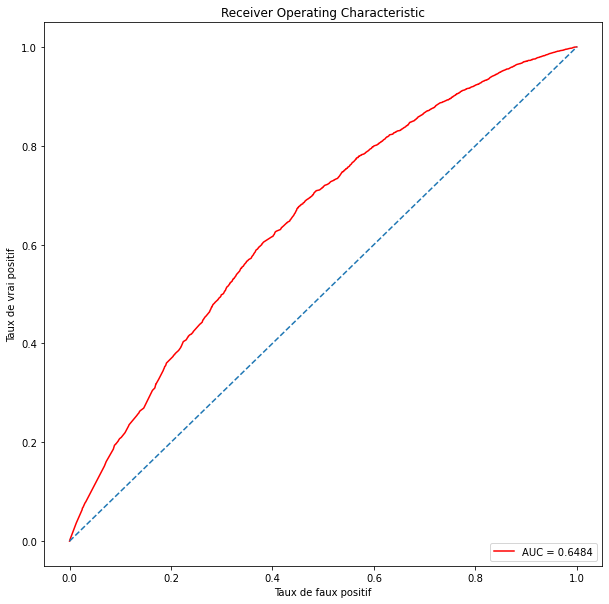

In [55]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

In [56]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_xgb)
df_metrics['name']='XGBoost'
df_metrics['params']= param_xgb
save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_xgb)

AUC : 0.6483830046937493
Accurancy  : 0.3602016478751084
Score custom : 0.319297484822203
Le temps d'éxecution est : 0.3086713000002419


array([[26925, 57937],
       [ 1078,  6300]], dtype=int64)

([<matplotlib.axis.YTick at 0x19807c3a3d0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

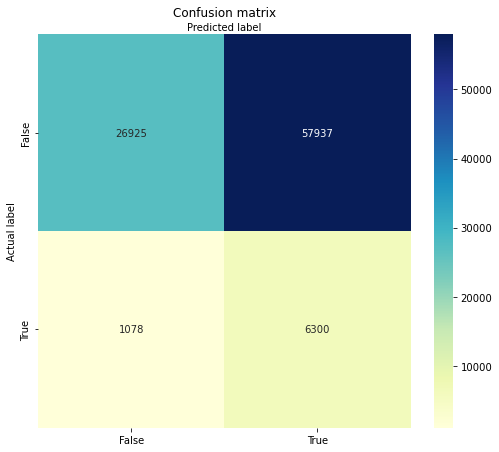

In [57]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [ ]:
La performance globale du XGBOOST est un peu moins bonne que celle de la régression logistique
Le taux de faux négatifs est de 1.16 % plus bas que 2.70 % pour la regression logistique
En revanche le taux de faux positifs de 62% est plus élévé que précédemment 29%
Un grand delta entre recall et precision (85% et 10%) 
Le custom score est de 31.9% alors qu'il était de 64% avec la régression logistique

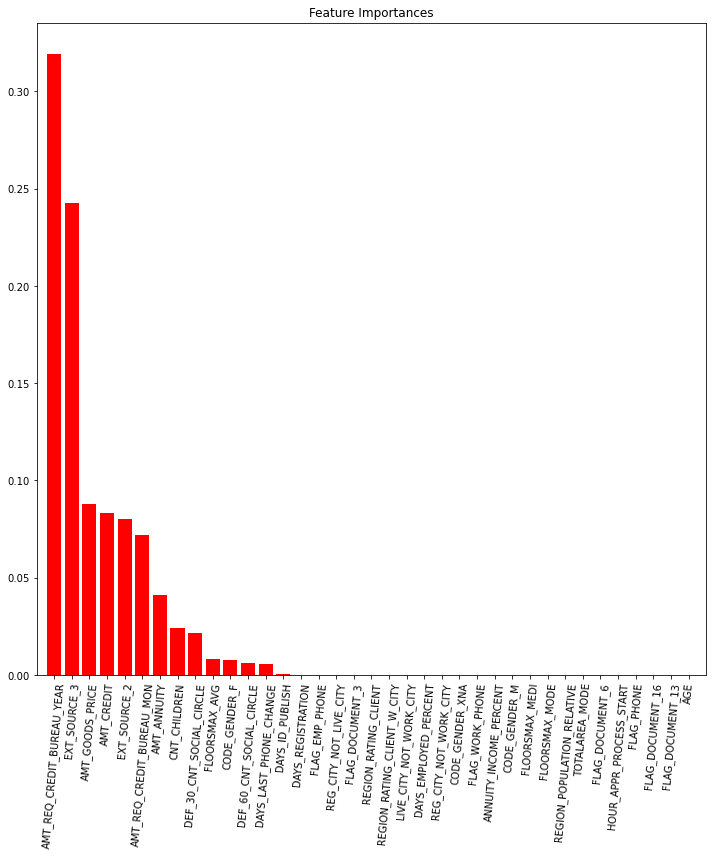

In [58]:
importances = model_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Feature Importances')
plt.bar(range(X_train_SMOTE.shape[1]), importances[indices],
       color='r', align='center')
ax.set_xticks(range(X.shape[1]))
ax.set_xticklabels([list(X.columns)[i] for i in indices], rotation=85)
ax.set_xlim([-1, X.shape[1]])
plt.show()

#### 2.3.2.1. Interprétation avec Shap

In [59]:
explainer_xgb = shap.TreeExplainer(model_xgb)

In [60]:
shap_values = explainer_xgb.shap_values(X.values)

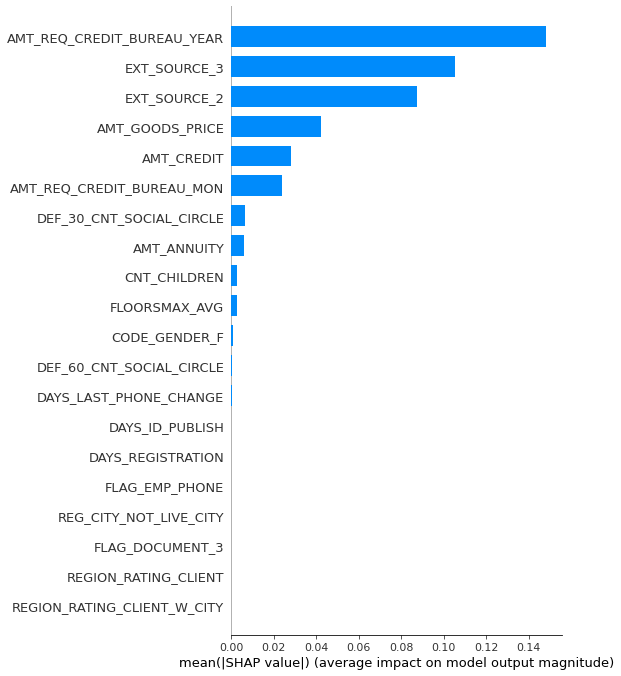

In [61]:
shap.summary_plot(shap_values, X_test, plot_type = "bar", feature_names=X.columns)

#### <span style='color:green'> 2.4. LightGBM model </span>

### 2.4.1. LightGBM simple

In [65]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [66]:
model2 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model2.fit(X_train_SMOTE,y_train_SMOTE,eval_set=[(X_test,y_test),(X_train_SMOTE,y_train_SMOTE)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.341504	valid_0's binary_logloss: 0.384285
[40]	training's binary_logloss: 0.22628	valid_0's binary_logloss: 0.298871
[60]	training's binary_logloss: 0.182859	valid_0's binary_logloss: 0.271608
[80]	training's binary_logloss: 0.166083	valid_0's binary_logloss: 0.262361
[100]	training's binary_logloss: 0.156668	valid_0's binary_logloss: 0.257648


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [93]:
# Prédiction sur le jeu de test
y_pred_2=model2.predict(X_test)

In [94]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_2)
df_metrics['name']='Light_GBM'

save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_2)

AUC : 0.6389587697546765
Accurancy  : 0.918962863398877
Score custom : 0.6433379582457129
Le temps d'éxecution est : 0.2142656000005445


array([[84630,   211],
       [ 7265,   148]], dtype=int64)

#### Comparez la précision du train et test set 

In [95]:
y_pred_train = model2.predict(X_train_SMOTE)

#### Vérifier le surapprentissage 

In [96]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model2.score(X_train_SMOTE, y_train_SMOTE)))

print('Test set score: {:.4f}'.format(model2.score(X_test, y_test)))

Training set score: 0.9514
Test set score: 0.9190


Accuracy score pour le training et le test set est assez comparable. Donc, on ne peut pas dire qu'il y a surapprentissage.

In [97]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_2)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84630   211]
 [ 7265   148]]

True Positives(TP) =  84630

True Negatives(TN) =  148

False Positives(FP) =  211

False Negatives(FN) =  7265


<AxesSubplot:>

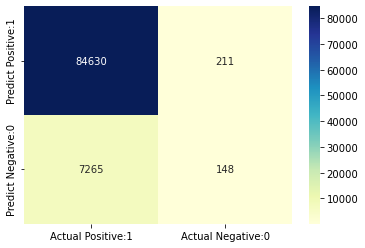

In [98]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Métriques de classification

In [99]:
roc_auc_2 = roc_auc_score(y_test, model2.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc_2)
print(classification_report(y_test, y_pred_2))

AUC : 0.7261
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.41      0.02      0.04      7413

    accuracy                           0.92     92254
   macro avg       0.67      0.51      0.50     92254
weighted avg       0.88      0.92      0.88     92254



### 2.4.2. LightGBM à l'aide d'un Grid Search cv 

In [70]:
param_lgb ={'learning_rate' : [0.01]}


clf_lgb = lgb.LGBMClassifier(boosting_type='gbdt',\
                   num_leaves=31, \
                   max_depth=8, \
                   n_estimators=100, \
                   objective='binary', \
                   min_child_weight=0.001, \
                   min_child_samples=40, \
                   subsample=1.0, \
                   subsample_freq=0, \
                   colsample_bytree=1.0, \
                   reg_alpha=0.0, \
                   reg_lambda=0.0, \
                   random_state=None,\
                   n_jobs=-1,\
                   silent=True, \
                  
                  )

In [71]:
grid_lgb = GridSearchCV(
                    estimator=clf_lgb,
                    param_grid = param_lgb, 
                    scoring= custom_score,
                    cv=5
                  )

In [72]:
grid_lgb.fit(X_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_depth=8, min_child_samples=40,
                                      objective='binary', silent=True),
             param_grid={'learning_rate': [0.01]},
             scoring=make_scorer(custom_metric))

In [73]:
model_lgb = grid_lgb.best_estimator_

In [74]:
grid_lgb.best_params_

{'learning_rate': 0.01}

In [75]:
y_pred_lgb = model_lgb.predict(X_test)

In [76]:
grid_lgb.best_estimator_.score(X_test, y_test)

0.8844969644405898

In [77]:
tab_auroc = []

y_prob_lr = model_lgb.predict_proba(X_test)[:, 1]
y_pred = model_lgb.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, model_lgb.predict(X_test)))

Aire sous la courbe ROC: 0.6782
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     84862
         1.0       0.19      0.14      0.16      7378

    accuracy                           0.88     92240
   macro avg       0.56      0.54      0.55     92240
weighted avg       0.87      0.88      0.88     92240



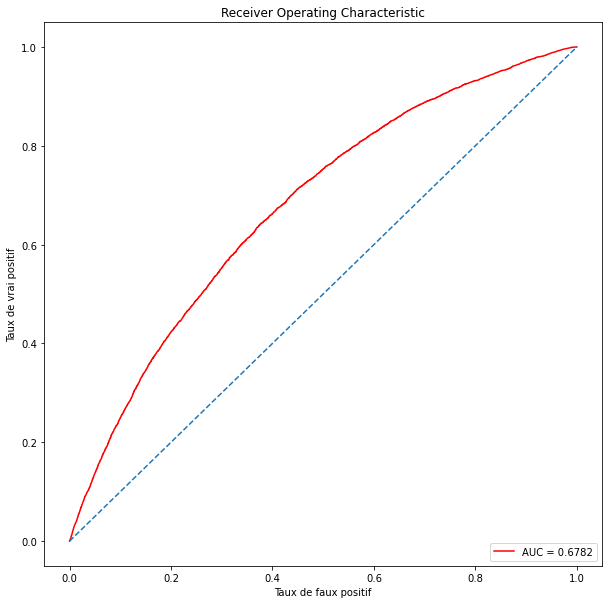

In [78]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

In [79]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_lgb)
df_metrics['name']='LightGBM'
df_metrics['params']= clf_lgb
save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_lgb)

AUC : 0.6781653301950995
Accurancy  : 0.8844969644405898
Score custom : 0.6433217692974849
Le temps d'éxecution est : 0.13000770000007833


array([[80564,  4298],
       [ 6356,  1022]], dtype=int64)

([<matplotlib.axis.YTick at 0x1981b3e3ac0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

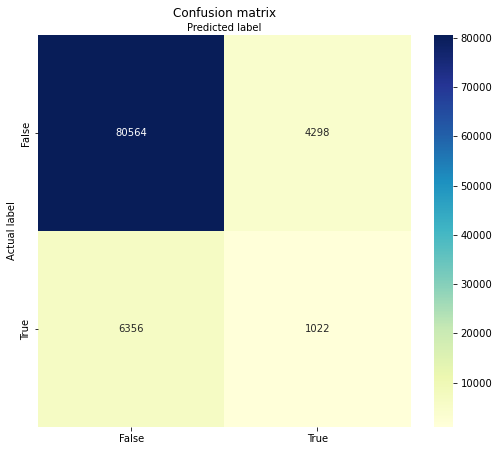

In [80]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_lgb)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

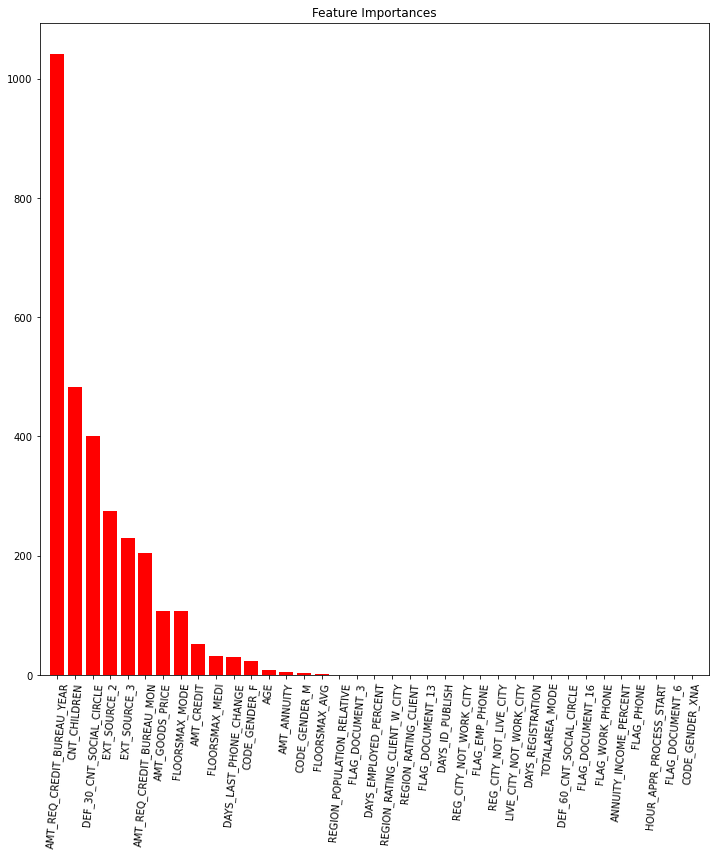

In [81]:
importances = model_lgb.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Feature Importances')
plt.bar(range(X_train_SMOTE.shape[1]), importances[indices],
       color='r', align='center')
ax.set_xticks(range(X.shape[1]))
ax.set_xticklabels([list(X.columns)[i] for i in indices], rotation=85)
ax.set_xlim([-1, X.shape[1]])
plt.show()

In [82]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (18, 8))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:20]))), 
            df['importance_normalized'].head(20), 
            align = 'center', edgecolor = 'gold', color = 'blue')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:20]))))
    ax.set_yticklabels(df['feature'].head(20))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.savefig('barplot.png')
    plt.show()
    #plt.savefig('barplot.png')
    
    return df

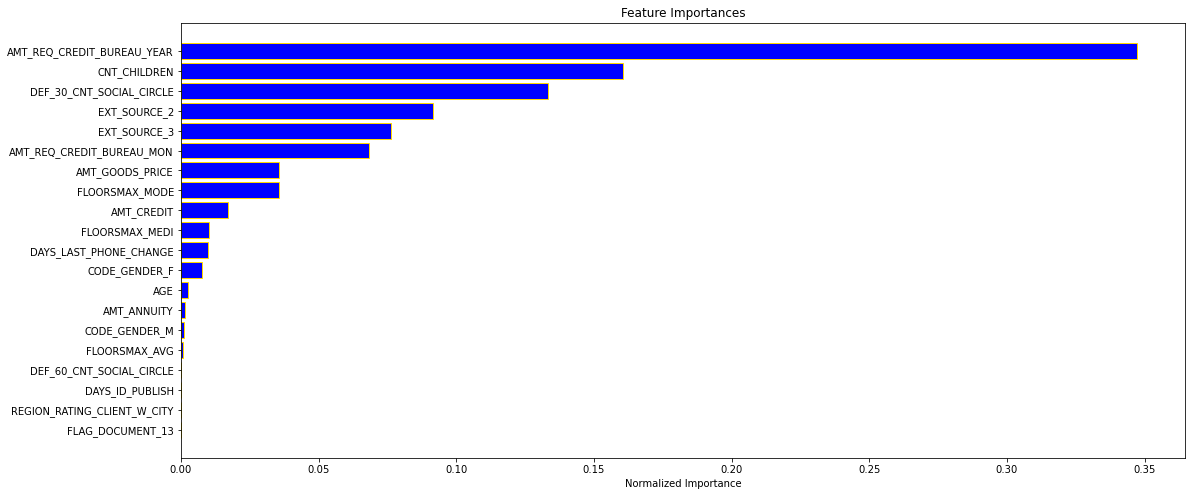

In [83]:
# Make the feature importance dataframe
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model_lgb.feature_importances_})

lgb_importance_feature = plot_feature_importances(feature_importances)

In [122]:
#plt.savefig('barplot.png')

<Figure size 432x288 with 0 Axes>

In [125]:
#import joblib
#joblib.dump(feature_importances, 'most_important_features.joblib')

['most_important_features.joblib']

In [84]:
import pickle
# now you can save it to a file
with open('final_model_lgb.pkl', 'wb') as f:
    pickle.dump(model_lgb, f)

#### 2.4.2.1. Interprétation avec Shap

In [85]:
explainer = shap.TreeExplainer(model_lgb)

In [86]:
shap_values = explainer.shap_values(X.values)

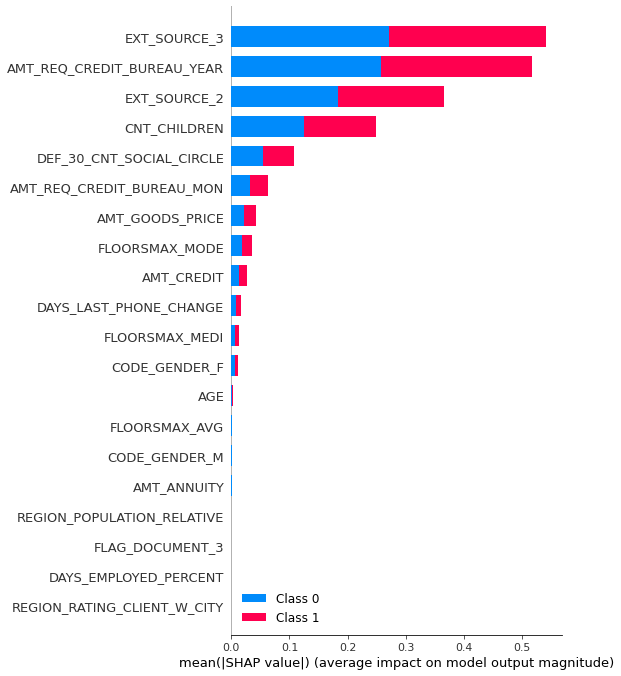

In [87]:
shap.summary_plot(shap_values, X_test, plot_type = "bar", feature_names=X.columns)

In [88]:
with open('explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

#### <span style='color:green'> 2.5. Forêt aléatoire </span>
#### <span style='color:green'> 2.5.1. Forêt aléatoire simple </span>

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
model3 = RandomForestClassifier(n_estimators = 100, random_state = 24)
model3.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_3 = model3.predict(X_test)

In [136]:
accuracy_3 = accuracy_score(y_pred_3, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_3)))

LightGBM Model accuracy score: 0.9152


In [137]:
roc_auc_3 = roc_auc_score(y_test, model3.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc_3)
print(classification_report(y_test, y_pred_3))

AUC : 0.7007
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     84841
         1.0       0.29      0.04      0.07      7413

    accuracy                           0.92     92254
   macro avg       0.61      0.52      0.51     92254
weighted avg       0.87      0.92      0.88     92254



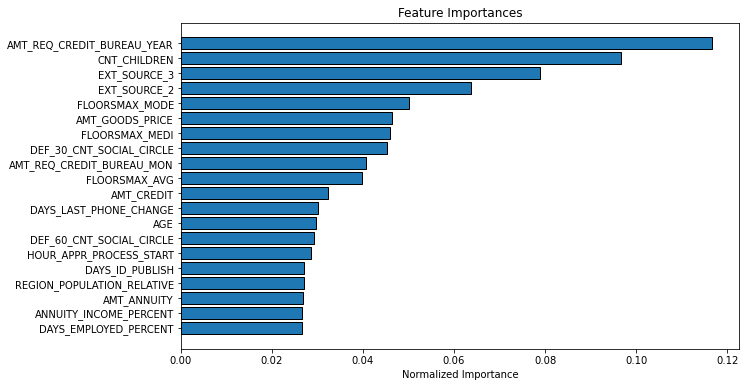

<Figure size 432x288 with 0 Axes>

In [138]:
# Make the feature importance dataframe
feature_importances = pd.DataFrame({'feature': X.columns, 'importance':  model3.feature_importances_})

fi_sorted = plot_feature_importances(feature_importances)

#### <span style='color:green'> 2.5.2. Forêt aléatoire utilisant un GridSearchCV  </span>

In [141]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [142]:
# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid_rfc = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid_rfc.fit(X_train_SMOTE, y_train_SMOTE)

In [145]:
grid_rfc.best_params_

{'max_depth': 16, 'n_estimators': 256}

In [146]:
model_rfc = grid_rfc.best_estimator_

In [147]:
pred_rfc=model_rfc.predict(X_test)

In [148]:
tab_auroc = []

y_prob_lr = model_rfc.predict_proba(X_test)[:, 1]
y_pred = model_rfc.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, model_rfc.predict(X_test)))

Aire sous la courbe ROC: 0.6948
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     84841
         1.0       0.21      0.13      0.16      7413

    accuracy                           0.89     92254
   macro avg       0.57      0.54      0.55     92254
weighted avg       0.87      0.89      0.88     92254



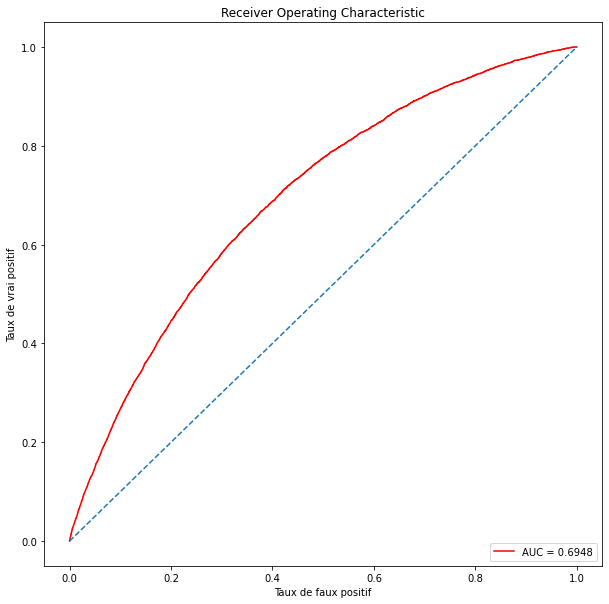

In [149]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

([<matplotlib.axis.YTick at 0x2c1968663d0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

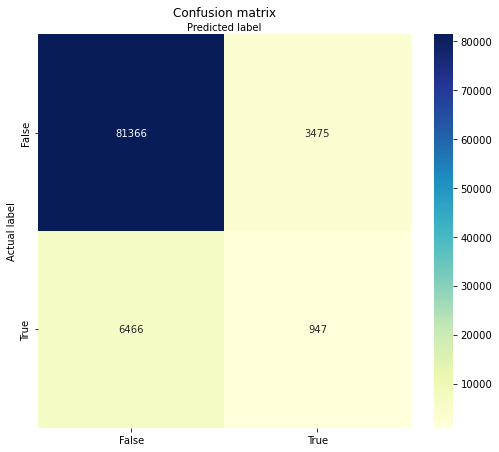

In [154]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_rfc)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [152]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(pred_rfc)
df_metrics['name']='Random Forest'
df_metrics['params']= param_grid
save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
#confusion_matrix(y_test, pred_rfc)

AUC : 0.6947922007266311
Accurancy  : 0.8922431547683569
Score custom : 0.6469312983718862
Le temps d'éxecution est : 0.2056589999992866


In [ ]:
Comme le lightgbm les forest aleatoires ont du mal à détecter les vrais positifs (1.02 % contre 1.10% pour lightgbm)
la performance globale est un peu meilleure que le lightgbm mais il est plus lent en temps de traitement
On va faire une synthèse des métriques pour voir quel modèle on choisit

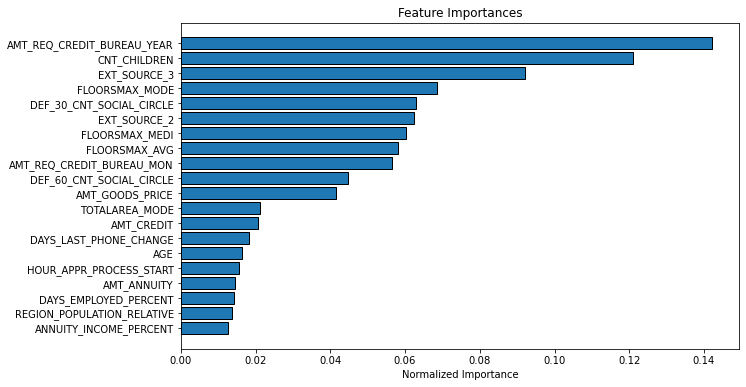

<Figure size 432x288 with 0 Axes>

In [153]:
# Make the feature importance dataframe
feature_importances_rfc = pd.DataFrame({'feature': X.columns, 'importance': model_rfc.feature_importances_})

fi_sorted = plot_feature_importances(feature_importances_rfc)

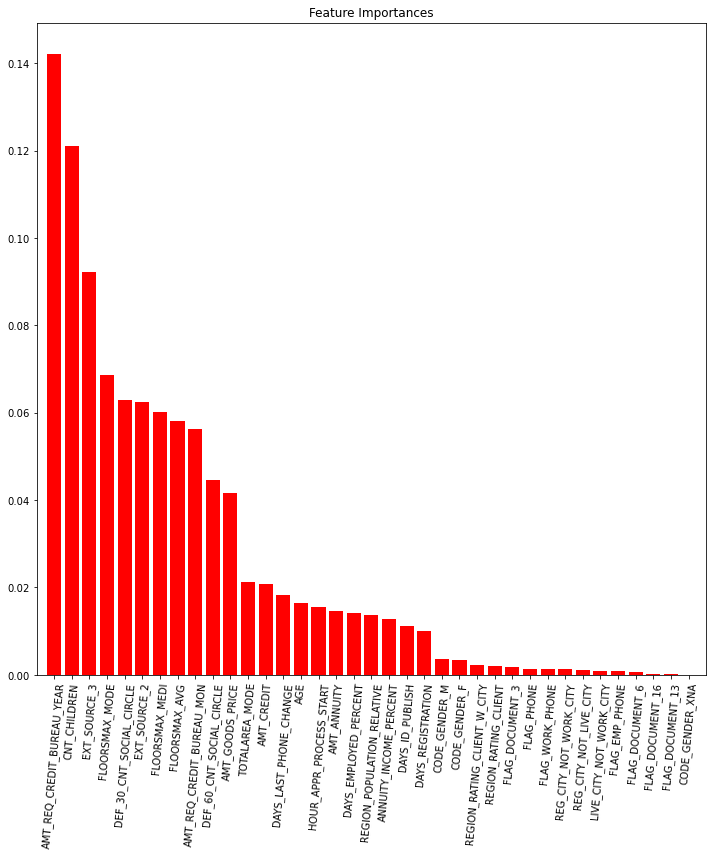

In [155]:
importances = model_rfc.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Feature Importances')
plt.bar(range(X_train_SMOTE.shape[1]), importances[indices],
       color='r', align='center')
ax.set_xticks(range(X.shape[1]))
ax.set_xticklabels([list(X.columns)[i] for i in indices], rotation=85)
ax.set_xlim([-1, X.shape[1]])
plt.show()

## 3. Resultat des métriques

In [156]:
models = [LogisticRegression(),xgb.XGBClassifier(),lgb.LGBMClassifier(),RandomForestClassifier()]

In [59]:
def train_models(model, X_train_SMOTE, X_test, y_train_SMOTE, y_test):
    model.fit(X_train_SMOTE, y_train_SMOTE)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
      'Accurancy': accuracy_score(y_test, model.predict(X_test)),
      'Custom score' : custom_metric(y_test, model.predict(X_test))}
   
    return output

In [158]:
%%time

name = []
auc = []
accuracy = []
custom_score = []
time_ = []

for model in models:
    start = time.time()
    results = train_models(model, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

    name.append(type(model).__name__)
    auc.append(results['AUC'])
    accuracy.append(results['Accurancy'])
    custom_score.append(results['Custom score'])
    time_.append(time.time()-start)

#Initialise data of lists
base_models = pd.DataFrame(data=[name, auc, accuracy, custom_score, time_]).T
base_models.columns = ['Model', 'AUC', 'Accurancy','Custom score','Time']
base_models.sort_values('AUC', ascending=False, inplace=True)
base_models

CPU times: total: 6min 3s
Wall time: 2min 24s


,Model,AUC,Accurancy,Custom score,Time
0,LogisticRegression,0.73365,0.681792,0.586679,3.355342
2,LGBMClassifier,0.728189,0.919125,0.642894,2.389192
1,XGBClassifier,0.726133,0.918833,0.64666,30.644638
3,RandomForestClassifier,0.699005,0.915527,0.644796,107.679598


In [ ]:
# Synthèse des résultats des métriques et choix du modèle
On va écarter la régression logistique car elle a le moins bon custom score (0.58) et accuracy (0.68).
Les forets aléatoires ont un temps de traitement le plus long (107.67) et une perofrmance globale moins bonne 
que LightGBM  et XGBoost.
LightGBM aune meilleure AUC que XGBoost (0.7281 contre 0.7261), une meilleure accuracy (0.9191 contre 0.9188) et surtout ici
15 fois plus rapide que XGBoost (2.38 contre 30.62).
On va faire le choix de lightGBM pour les taux de FP et FN peu élevés (4.65 et 6.88 %)

## 4. Simplification des datas pour relancer le modèle choisi

In [ ]:
# On a choisi le lightGBM model pour notre classification

In [ ]:
# on va simplifier les datas

In [89]:
df.columns

Index(['TARGET', 'SK_ID_CURR', 'AGE', 'DAYS_EMPLOYED_PERCENT',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'DAYS_REGISTRATION', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'FLAG_WORK_PHONE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'ANNUITY_INCOME_PERCENT', 'CNT_CHILDREN', 'EXT_SOURCE_3',
       'EXT_SOURCE_2', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'TOTALAREA_MODE',
       'AMT_CREDIT', 'FLAG_DOCUMENT_6', 'HOUR_APPR_PROCESS_START',
       'FLAG_PHONE', 'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_MON',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_13', 'CODE_GENDER_F',
       'CODE_GENDER_M', 'CODE_GENDER_XNA'],
      dtype='object')

In [90]:
list_simplifie = ['TARGET', 'SK_ID_CURR', 'AGE', 'DAYS_EMPLOYED_PERCENT',
       'DAYS_LAST_PHONE_CHANGE', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR',
        'CNT_CHILDREN', 'EXT_SOURCE_3',
       'EXT_SOURCE_2', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 
       'AMT_CREDIT', 
        'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_MON',
        'CODE_GENDER_F'
       ]

In [91]:
df =  pd.read_csv("df_cleaned_enc.csv")

In [92]:
# les 45 premières lignes du fichier nettoyé et encodé
df1 =  pd.read_csv("df1.csv")

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       45 non-null     int64  
 1   SK_ID_CURR                   45 non-null     int64  
 2   AGE                          45 non-null     int64  
 3   DAYS_EMPLOYED_PERCENT        45 non-null     float64
 4   REGION_RATING_CLIENT_W_CITY  45 non-null     int64  
 5   REGION_RATING_CLIENT         45 non-null     int64  
 6   DAYS_LAST_PHONE_CHANGE       45 non-null     float64
 7   DAYS_ID_PUBLISH              45 non-null     int64  
 8   REG_CITY_NOT_WORK_CITY       45 non-null     int64  
 9   FLAG_EMP_PHONE               45 non-null     int64  
 10  REG_CITY_NOT_LIVE_CITY       45 non-null     int64  
 11  FLAG_DOCUMENT_3              45 non-null     int64  
 12  DAYS_REGISTRATION            45 non-null     float64
 13  LIVE_CITY_NOT_WORK_CIT

In [94]:
df1BIS = df1[list_simplifie ]

In [95]:
#  Export du fichier 45 lignes , encodé, non standardisé pour API
df1BIS.to_csv('df1BIS.csv', index=False)

import pickle
# now you can save it to a file
with open('df1BIS.pkl', 'wb') as f:
    pickle.dump(df1BIS, f)

In [96]:
# Pour modélisation simplifiée
df2 = df[45:]

In [97]:
df2BIS = df2[list_simplifie ]

In [98]:
df2BIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307466 entries, 45 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307466 non-null  int64  
 1   SK_ID_CURR                  307466 non-null  int64  
 2   AGE                         307466 non-null  int64  
 3   DAYS_EMPLOYED_PERCENT       307466 non-null  float64
 4   DAYS_LAST_PHONE_CHANGE      307466 non-null  float64
 5   REG_CITY_NOT_WORK_CITY      307466 non-null  int64  
 6   FLAG_EMP_PHONE              307466 non-null  int64  
 7   DEF_60_CNT_SOCIAL_CIRCLE    307466 non-null  float64
 8   DEF_30_CNT_SOCIAL_CIRCLE    307466 non-null  float64
 9   AMT_REQ_CREDIT_BUREAU_YEAR  307466 non-null  float64
 10  CNT_CHILDREN                307466 non-null  int64  
 11  EXT_SOURCE_3                307466 non-null  float64
 12  EXT_SOURCE_2                307466 non-null  float64
 13  FLOORSMAX_AVG

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(df2BIS)
scaled_train = scaler.transform(df2BIS)

In [101]:
#In order to keep our column names we include scaled_values to our train dataframes like this
df = pd.DataFrame(scaled_train, index=df2BIS.index, columns=df2BIS.columns)

In [102]:
df.head()

,TARGET,SK_ID_CURR,AGE,DAYS_EMPLOYED_PERCENT,DAYS_LAST_PHONE_CHANGE,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,...,EXT_SOURCE_2,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_MON,CODE_GENDER_F
45,0.0,0.000000,0.020408,0.845996,0.892358,0.0,1.0,0.041667,0.029412,0.04,...,0.626365,0.2,0.2,0.2,0.034792,0.125232,0.033708,0.028800,0.0,1.0
46,0.0,0.000003,0.714286,0.862790,0.848788,0.0,0.0,0.000000,0.000000,0.16,...,0.289666,0.2,0.2,0.2,0.052750,0.268617,0.064974,0.062531,0.0,1.0
47,0.0,0.000006,0.714286,0.636399,0.709459,1.0,1.0,0.000000,0.000000,0.08,...,0.104375,0.2,0.2,0.2,0.046016,0.309272,0.053843,0.098368,0.0,1.0
48,0.0,0.000008,0.693878,0.693196,0.817335,0.0,1.0,0.000000,0.000000,0.00,...,0.689107,0.2,0.2,0.2,0.326599,0.282797,0.325843,0.138996,0.0,1.0
49,0.0,0.000011,0.612245,0.284577,0.650979,1.0,1.0,0.041667,0.029412,0.04,...,0.612789,0.2,0.2,0.2,0.326599,0.134537,0.364998,0.188417,0.0,0.0


In [103]:
# Features : toutes les colonnes, sauf la cible
X = df.drop(['TARGET','SK_ID_CURR'], axis=1)

# Le cible
y = df[['TARGET']]

In [104]:
X.shape

(307466, 20)

In [105]:
y.shape

(307466, 1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215226, 20), (92240, 20), (215226, 1), (92240, 1))

In [108]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: [17443] 
Label 0, Before using SMOTE: [197783] 


In [109]:
oversample = SMOTE()

In [110]:
# Oversampling using smote on X_train
SMT = SMOTE(sampling_strategy='auto', k_neighbors=5,
           n_jobs=-1, random_state=14) #'minority'


X_train_SMOTE, y_train_SMOTE = SMT.fit_resample(X_train, y_train)

### 4.1. LightGBM simple

In [111]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [112]:
model2b = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model2b.fit(X_train_SMOTE,y_train_SMOTE,eval_set=[(X_test,y_test),(X_train_SMOTE,y_train_SMOTE)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.357551	valid_0's binary_logloss: 0.39431
[40]	training's binary_logloss: 0.261582	valid_0's binary_logloss: 0.320859
[60]	training's binary_logloss: 0.217186	valid_0's binary_logloss: 0.291299
[80]	training's binary_logloss: 0.191903	valid_0's binary_logloss: 0.275927
[100]	training's binary_logloss: 0.178287	valid_0's binary_logloss: 0.26842


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [113]:
# Prédiction sur le jeu de test
y_pred_2b=model2b.predict(X_test)

In [114]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_2b)
df_metrics['name']='Light_GBM'

save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_2b)

AUC : 0.6781653301950995
Accurancy  : 0.9172593235039028
Score custom : 0.64895381613183
Le temps d'éxecution est : 0.28176380000013523


array([[84301,   561],
       [ 7071,   307]], dtype=int64)

In [115]:
y_pred_train = model2b.predict(X_train_SMOTE)

In [116]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model2b.score(X_train_SMOTE, y_train_SMOTE)))

print('Test set score: {:.4f}'.format(model2b.score(X_test, y_test)))

Training set score: 0.9430
Test set score: 0.9173


In [117]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_2b)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84301   561]
 [ 7071   307]]

True Positives(TP) =  84301

True Negatives(TN) =  307

False Positives(FP) =  561

False Negatives(FN) =  7071


<AxesSubplot:>

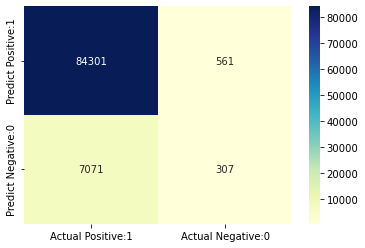

In [118]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [119]:
roc_auc_2 = roc_auc_score(y_test, model2b.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc_2)
print(classification_report(y_test, y_pred_2b))

AUC : 0.7157
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     84862
         1.0       0.35      0.04      0.07      7378

    accuracy                           0.92     92240
   macro avg       0.64      0.52      0.52     92240
weighted avg       0.88      0.92      0.89     92240



### 4.2. LightGBM à l'aide d'un Grid Search CV

In [120]:
param_lgb ={'learning_rate' : [0.01]}


clf_lgb = lgb.LGBMClassifier(boosting_type='gbdt',\
                   num_leaves=31, \
                   max_depth=8, \
                   n_estimators=100, \
                   objective='binary', \
                   min_child_weight=0.001, \
                   min_child_samples=40, \
                   subsample=1.0, \
                   subsample_freq=0, \
                   colsample_bytree=1.0, \
                   reg_alpha=0.0, \
                   reg_lambda=0.0, \
                   random_state=None,\
                   n_jobs=-1,\
                   silent=True, \
                  
                  )

In [121]:
grid_lgb = GridSearchCV(
                    estimator=clf_lgb,
                    param_grid = param_lgb, 
                    scoring= custom_score,
                    cv=5
                  )

In [122]:
grid_lgb.fit(X_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_depth=8, min_child_samples=40,
                                      objective='binary', silent=True),
             param_grid={'learning_rate': [0.01]},
             scoring=make_scorer(custom_metric))

In [123]:
model_lgb_2 = grid_lgb.best_estimator_

In [124]:
grid_lgb.best_params_

{'learning_rate': 0.01}

In [125]:
y_pred_lgb = model_lgb_2.predict(X_test)

In [126]:
grid_lgb.best_estimator_.score(X_test, y_test)

0.8717259323503903

In [127]:
tab_auroc = []

y_prob_lr = model_lgb_2.predict_proba(X_test)[:, 1]
y_pred = model_lgb_2.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, model_lgb_2.predict(X_test)))

Aire sous la courbe ROC: 0.6878
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     84862
         1.0       0.21      0.23      0.22      7378

    accuracy                           0.87     92240
   macro avg       0.57      0.58      0.58     92240
weighted avg       0.87      0.87      0.87     92240



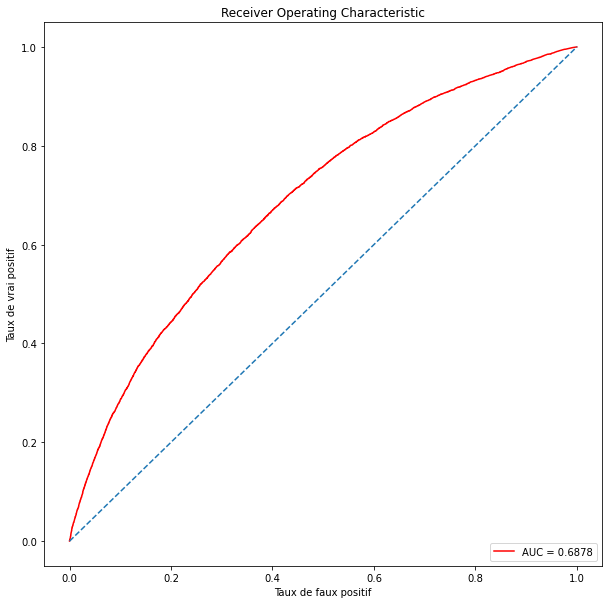

In [128]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

In [129]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_lgb)
df_metrics['name']='LightGBM'
df_metrics['params']= clf_lgb
save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_lgb)

AUC : 0.6878043382013305
Accurancy  : 0.8717259323503903
Score custom : 0.655214657415438
Le temps d'éxecution est : 0.0785436999999547


array([[78736,  6126],
       [ 5706,  1672]], dtype=int64)

([<matplotlib.axis.YTick at 0x19807eb4400>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

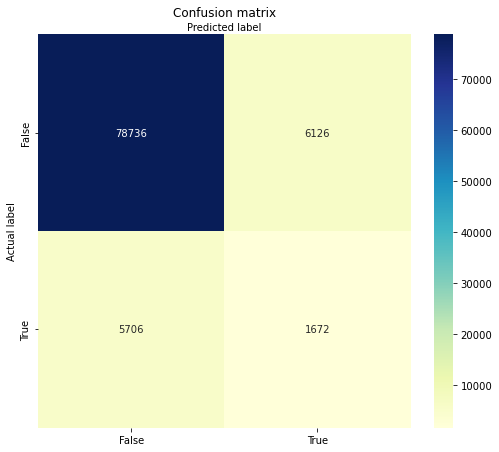

In [130]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_lgb)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [ ]:
La simplification du modèle ligthGBM améliore les performances globales du lightGBM (0.67 à 0.68),
On remarque une petite augmentation des FP qui passent de 4.65% à 6.64% , légère diminution des FN qui passent de 
6.88 à 6.18 % , le modèle n'est pas bon à détecter les TP qui restent à 1%. Il est plus fort à détecter les TN à 88.19%
LE RECALL est de 22.66 % la précision de 21.44%
Ce modèle n'est pas très performant. Mais compte tenu des autres critères de temps de traitement, du custom score , accuracy
et des pourcentages des FN et FP, c'est ce modèle qui est choisi.

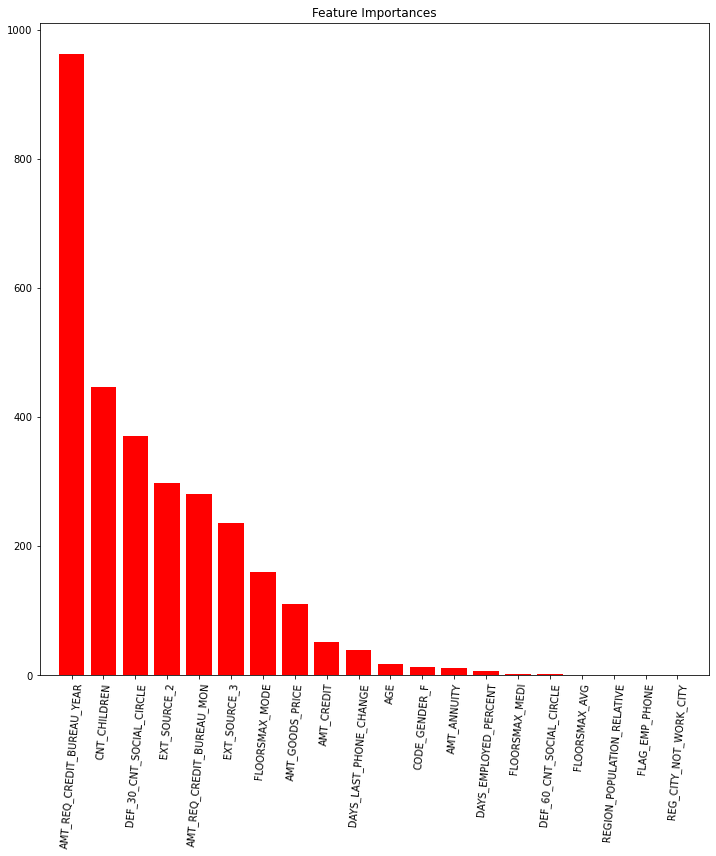

In [131]:
importances = model_lgb_2.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Feature Importances')
plt.bar(range(X_train_SMOTE.shape[1]), importances[indices],
       color='r', align='center')
ax.set_xticks(range(X.shape[1]))
ax.set_xticklabels([list(X.columns)[i] for i in indices], rotation=85)
ax.set_xlim([-1, X.shape[1]])
plt.show()

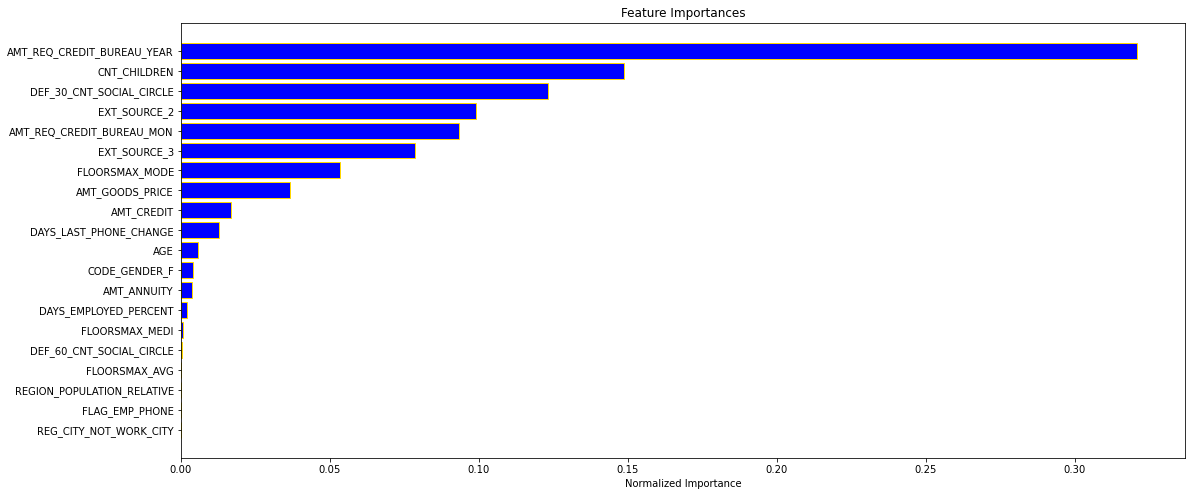

In [132]:
# Make the feature importance dataframe
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model_lgb_2.feature_importances_})

lgb_importance_feature = plot_feature_importances(feature_importances)

In [102]:
#plt.savefig('barplot.png')

<Figure size 432x288 with 0 Axes>

In [103]:
#import joblib
#joblib.dump(feature_importances, 'most_important_features.joblib')

['most_important_features.joblib']

In [133]:
import pickle
# now you can save it to a file
with open('final_model_lgb_2.pkl', 'wb') as f:
    pickle.dump(model_lgb_2, f)

### 4.2.1 Interprétation avec SHAP

In [135]:
explainer = shap.TreeExplainer(model_lgb_2)

In [136]:
shap_values = explainer.shap_values(X.values)

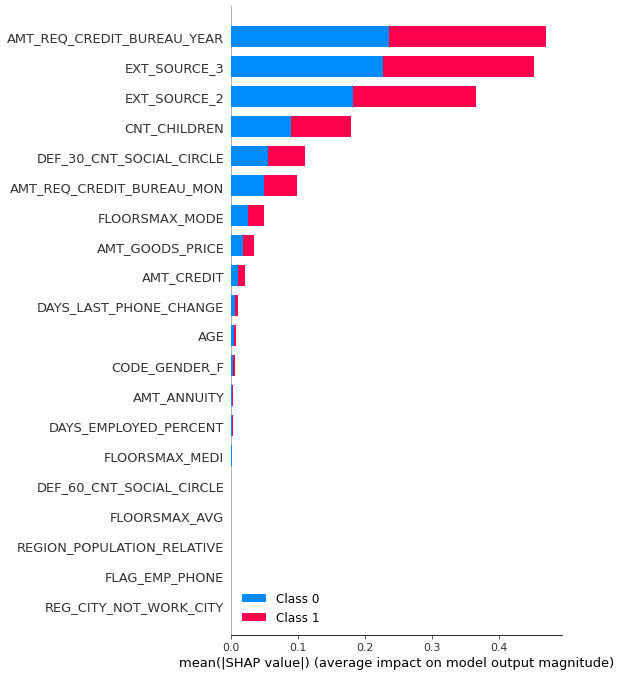

In [137]:
shap.summary_plot(shap_values, X_test, plot_type = "bar", feature_names=X.columns)

In [138]:
with open('explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

 ## 5. Dataframe pour positionner les clients dans l'API

In [139]:
# On part de df2BIS 
df2BIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307466 entries, 45 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307466 non-null  int64  
 1   SK_ID_CURR                  307466 non-null  int64  
 2   AGE                         307466 non-null  int64  
 3   DAYS_EMPLOYED_PERCENT       307466 non-null  float64
 4   DAYS_LAST_PHONE_CHANGE      307466 non-null  float64
 5   REG_CITY_NOT_WORK_CITY      307466 non-null  int64  
 6   FLAG_EMP_PHONE              307466 non-null  int64  
 7   DEF_60_CNT_SOCIAL_CIRCLE    307466 non-null  float64
 8   DEF_30_CNT_SOCIAL_CIRCLE    307466 non-null  float64
 9   AMT_REQ_CREDIT_BUREAU_YEAR  307466 non-null  float64
 10  CNT_CHILDREN                307466 non-null  int64  
 11  EXT_SOURCE_3                307466 non-null  float64
 12  EXT_SOURCE_2                307466 non-null  float64
 13  FLOORSMAX_AVG

In [141]:
#TARGET,value,indicator
df_rej = df2BIS [df2BIS['TARGET'] == 1]
df_acc = df2BIS [df2BIS['TARGET'] == 0]

In [142]:
list1 = [ ('Crédit accepté',df_acc['EXT_SOURCE_2'].mean(), 'EXT_SOURCE_2' )]
barplot_df = pd.DataFrame(list1 , columns = ['TARGET' , 'value', 'indicator'])

In [143]:
#Add new ROW
barplot_df = barplot_df.append({'TARGET' : 'Crédit rejeté' , 'value' : df_rej['EXT_SOURCE_2'].mean(), 'indicator' : 'EXT_SOURCE_2'} , ignore_index=True)
barplot_df = barplot_df.append({'TARGET' : 'Crédit accepté' , 'value' : df_acc['EXT_SOURCE_3'].mean(), 'indicator' : 'EXT_SOURCE_3'} , ignore_index=True)
barplot_df = barplot_df.append({'TARGET' : 'Crédit rejeté' , 'value' : df_rej['EXT_SOURCE_3'].mean(), 'indicator' : 'EXT_SOURCE_3'} , ignore_index=True)
barplot_df = barplot_df.append({'TARGET' : 'Crédit accepté' , 'value' : df_acc['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), 'indicator' : 'AMT_REQ_CREDIT_BUREAU_YEAR'} , ignore_index=True)
barplot_df = barplot_df.append({'TARGET' : 'Crédit rejeté' , 'value' : df_rej['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), 'indicator' : 'AMT_REQ_CREDIT_BUREAU_YEAR'} , ignore_index=True)

print(barplot_df)

           TARGET     value                   indicator
0  Crédit accepté  0.523641                EXT_SOURCE_2
1   Crédit rejeté  0.411325                EXT_SOURCE_2
2  Crédit accepté  0.516863                EXT_SOURCE_3
3   Crédit rejeté  0.415732                EXT_SOURCE_3
4  Crédit accepté  1.772159  AMT_REQ_CREDIT_BUREAU_YEAR
5   Crédit rejeté  1.850852  AMT_REQ_CREDIT_BUREAU_YEAR


In [54]:
barplot_df.to_csv(r"C:\Users\DELL\barplot_df.csv")